# Submission Akhir: Menyelesaikan Permasalahan Institusi Pendidikan

- Nama: Hafiizh Taufiqul Hakim
- Email: 2012500720@student.budiluhur.ac.id
- Id Dicoding: hafizhtaufiqul1002

# Persiapan

### Menyiapkan library yang dibutuhkan

In [1]:
# Manipulasi Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
%matplotlib inline
import seaborn as sns
import os

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

# Save Model
import pickle

import warnings
warnings.filterwarnings('ignore')

### Menyiapkan data yang akan digunakan

In [2]:
# import dataset
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/students_performance/data.csv"

Dataset yang digunakan pada proyek ini adalah **data.csv** yang bersumber dari github Dicoding

# Data Understanding

Adapun kolom-kolom yang terdapat pada dataset sebagai berikut :

- Marital status - Status perkawinan siswa.
- Application mode - Metode aplikasi yang digunakan oleh siswa.
- Application order - Urutan siswa yang mendaftar.
- Course - Mata kuliah yang diambil oleh siswa.
- Daytime/evening attendance - Apakah siswa menghadiri kelas pada siang hari atau malam hari.
- Previous qualification - Kualifikasi yang diperoleh siswa sebelum mendaftar di pendidikan tinggi.
- Previous qualification (grade) - Nilai kualifikasi sebelumnya (antara 0 dan 200).
- Nacionality - Kewarganegaraan siswa.
- Mother's qualification - Kualifikasi ibu siswa.
- Father's qualification - Kualifikasi ayah siswa.
- Mother's occupation - Pekerjaan ibu siswa.
- Father's occupation - Pekerjaan ayah siswa.
- Admission grade - Nilai penerimaan (antara 0 dan 200)
- Displaced - Apakah siswa tersebut adalah orang yang terlantar.
- Educational special needs - Apakah siswa memiliki kebutuhan pendidikan khusus.
- Debtor - Apakah siswa adalah seorang debitur.
- Tuition fees up to date - Apakah biaya pendidikan siswa sudah sesuai dengan yang terbaru.
- Gender - Jenis kelamin siswa.
- Scholarship holder - Apakah siswa tersebut adalah pemegang beasiswa.
- Age at enrollment - Usia siswa pada saat pendaftaran.
- International - Apakah siswa tersebut adalah siswa internasional. 
- Curricular units 1st sem (credited) - Jumlah unit kurikuler yang dikreditkan oleh mahasiswa pada semester pertama.
- Curricular units 1st sem (enrolled) - Jumlah unit kurikuler yang didaftarkan oleh siswa pada semester pertama.
- Curricular units 1st sem (evaluations) - Jumlah unit kurikuler yang dievaluasi oleh siswa pada semester pertama.
- Curricular units 1st sem (approved) - Jumlah unit kurikuler yang disetujui oleh mahasiswa pada semester pertama.

# Data Preparation

##### Gathering data

In [3]:
df = pd.read_csv(dataset, delimiter=';')
df.head().T

,0,1,2,3,4
Marital_status,1,1,1,1,2
Application_mode,17,15,1,17,39
Application_order,5,1,5,2,1
Course,171,9254,9070,9773,8014
Daytime_evening_attendance,1,1,1,1,0
Previous_qualification,1,1,1,1,1
Previous_qualification_grade,122.0,160.0,122.0,122.0,100.0
Nacionality,1,1,1,1,1
Mothers_qualification,19,1,37,38,37
Fathers_qualification,12,3,37,37,38


##### Asessing Data

In [4]:
# Cek Tipe Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                         4424 non-null   i

In [5]:
num = df.select_dtypes(exclude='object').columns
cat = df.select_dtypes(include='object').columns

print("Jumlah data numerik:", len(num))
print("Jumlah data kategorik:", len(cat))

Jumlah data numerik: 36
Jumlah data kategorik: 1


In [6]:
# Cek Missing Value
df.isna().sum()

Marital_status                                  0
Application_mode                                0
Application_order                               0
Course                                          0
Daytime_evening_attendance                      0
Previous_qualification                          0
Previous_qualification_grade                    0
Nacionality                                     0
Mothers_qualification                           0
Fathers_qualification                           0
Mothers_occupation                              0
Fathers_occupation                              0
Admission_grade                                 0
Displaced                                       0
Educational_special_needs                       0
Debtor                                          0
Tuition_fees_up_to_date                         0
Gender                                          0
Scholarship_holder                              0
Age_at_enrollment                               0


In [7]:
# Cek Duplicated
df.duplicated().sum()

0

Tidak terdapat duplikasi pada dataset

In [8]:
# Cek Outlier
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []


filtered_entries = np.array([True] * len(df))
for col in num:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    #mulai filter outlier
    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 4424
Outlier All Data : 3519
Not Outlier All Data : 905



,Column Name,is Outlier,Lower Limit,Upper Limit,Outlier,No Outlier
0,Marital_status,True,1.000,1.000000,505,3919
1,Application_mode,False,-56.000,96.000000,0,4424
2,Application_order,True,-0.500,3.500000,541,3883
3,Course,True,8378.500,10262.500000,442,3982
4,Daytime_evening_attendance,False,1.000,1.000000,483,3941
5,Previous_qualification,True,1.000,1.000000,707,3717
6,Previous_qualification_grade,True,102.500,162.500000,179,4245
7,Nacionality,True,1.000,1.000000,110,4314
8,Mothers_qualification,False,-50.500,89.500000,0,4424
9,Fathers_qualification,False,-48.000,88.000000,0,4424


Ada beberapa data yang menunjukkan adanya outliers. Sehingga, perlu melakukan penanganan lebih lanjut dengan menggunakan metode IQR untuk mengatasi masalah ini.

##### Data Cleaning

In [9]:
df_clean = df.copy()

In [10]:
# Merubah Tipe data dari float ke int
change_fitur = df_clean.select_dtypes(include='float').columns
change_fitur

Index(['Previous_qualification_grade', 'Admission_grade',
       'Curricular_units_1st_sem_grade', 'Curricular_units_2nd_sem_grade',
       'Unemployment_rate', 'Inflation_rate', 'GDP'],
      dtype='object')

In [11]:
for col in change_fitur:
    df_clean[col] = df_clean[col].astype(int)

In [12]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Marital_status                                4424 non-null   int64 
 1   Application_mode                              4424 non-null   int64 
 2   Application_order                             4424 non-null   int64 
 3   Course                                        4424 non-null   int64 
 4   Daytime_evening_attendance                    4424 non-null   int64 
 5   Previous_qualification                        4424 non-null   int64 
 6   Previous_qualification_grade                  4424 non-null   int32 
 7   Nacionality                                   4424 non-null   int64 
 8   Mothers_qualification                         4424 non-null   int64 
 9   Fathers_qualification                         4424 non-null   int64 
 10  

Merubah kolom yang bertipe data float menjadi integer

In [13]:
# Handle Outliers
num = df_clean.select_dtypes(exclude='object').columns

outlier_columns = []

for col in num:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    outlier_step = 1.5 * IQR
    outlier_list_col = df_clean[(df_clean[col] < Q1 - outlier_step) | (df_clean[col] > Q3 + outlier_step)].index

    if outlier_list_col.any():
        outlier_columns.append(col)

print("Jumlah Kolom:", len(df_clean.columns))
print("Jumlah Kolom Outliers:", len(outlier_columns))

Jumlah Kolom: 37
Jumlah Kolom Outliers: 28


In [14]:
is_outlier = df_clean[outlier_columns]

print('Jumlah baris sebelum handle outlier :', df_clean.shape[0])

# Iterasi melalui setiap kolom untuk menangani outlier
for column in is_outlier:
    Q1 = df_clean[column].quantile(0.25)
    Q3 = df_clean[column].quantile(0.75)
    IQR = Q3 - Q1

    # Menghitung batas bawah dan atas outlier
    lower_limit = Q1 - (1.5 * IQR)
    upper_limit = Q3 + (1.5 * IQR)

    # Menghapus outlier dari DataFrame
    df_outliers = df_clean[(df_clean[column] >= lower_limit) & (df_clean[column] <= upper_limit)]

print('Jumlah baris setelah handle outlier :', df_outliers.shape[0])

Jumlah baris sebelum handle outlier : 4424
Jumlah baris setelah handle outlier : 4142


In [15]:
df_clean = df_outliers.copy()

### Data Transformation

##### Feature Mapping

In [16]:
df_clean = df_clean.drop(df_clean[df_clean['Status']=='Enrolled'].index)
df_clean['Status'].value_counts()

Status
Graduate    2118
Dropout     1298
Name: count, dtype: int64

In [17]:
def feature_map(df):
    df = df.copy() 
    marital_status_mapping = {
        1: 'Belum Menikah',
        2: 'Sudah Menikah',
        3: 'Duda',
        4: 'Berpisah',
        5: 'Belum Menikah',
        6: 'Berpisah'
    }
    df['Marital_status']=df['Marital_status'].map(marital_status_mapping)

    application_mode_mapping = {
        1: '1st phase - general contingent',
        2: 'Ordinance No. 612/93',
        5: '1st phase - special contingent (Azores Island)',
        7: 'Holders of other higher courses',
        10: 'Ordinance No. 854-B/99',
        15: 'International student (bachelor)',
        16: '1st phase - special contingent (Madeira Island)',
        17: '2nd phase - general contingent',
        18: '3rd phase - general contingent',
        26: 'Ordinance No. 533-A/99, item b2) (Different Plan)',
        27: 'Ordinance No. 533-A/99, item b3 (Other Institution)',
        39: 'Over 23 years old',
        42: 'Transfer',
        43: 'Change of course',
        44: 'Technological specialization diploma holders',
        51: 'Change of institution/course',
        53: 'Short cycle diploma holders',
        57: 'Change of institution/course (International)'
    }
    df['Application_mode']=df['Application_mode'].map(application_mode_mapping)

    course_mapping = {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design',
        9085: 'Veterinary Nursing',
        9119: 'Informatics Engineering',
        9130: 'Equinculture',
        9147: 'Management',
        9238: 'Social Service',
        9254: 'Tourism',
        9500: 'Nursing',
        9556: 'Oral Hygiene',
        9670: 'Advertising and Marketing Management',
        9773: 'Journalism and Communication',
        9853: 'Basic Education',
        9991: 'Management'
    }
    df['Course']=df['Course'].map(course_mapping)

    daytime_evening_mapping = {
        1: 'Daytime',
        0: 'Evening'
    }
    df['Daytime_evening_attendance']=df['Daytime_evening_attendance'].map(daytime_evening_mapping)

    previous_qualification_mapping = {
        1: 'Secondary education',
        2: "Higher education - bachelor's degree",
        3: 'Higher education - degree',
        4: 'Higher education - master\'s',
        5: 'Higher education - doctorate',
        6: 'Frequency of higher education',
        9: '12th year of schooling - not completed',
        10: '11th year of schooling - not completed',
        12: 'Other - 11th year of schooling',
        14: '10th year of schooling',
        15: '10th year of schooling - not completed',
        19: 'Basic education 3rd cycle (9th/10th/11th year) or equiv.',
        38: 'Basic education 2nd cycle (6th/7th/8th year) or equiv.',
        39: 'Technological specialization course',
        40: 'Higher education - degree (1st cycle)',
        42: 'Professional higher technical course',
        43: 'Higher education - master (2nd cycle)'
    }
    df['Previous_qualification']=df['Previous_qualification'].map(previous_qualification_mapping)

    nationality_mapping = {
        1: 'Portuguese',
        2: 'German',
        6: 'Spanish',
        11: 'Italian',
        13: 'Dutch',
        14: 'English',
        17: 'Lithuanian',
        21: 'Angolan',
        22: 'Cape Verdean',
        24: 'Guinean',
        25: 'Mozambican',
        26: 'Santomean',
        32: 'Turkish',
        41: 'Brazilian',
        62: 'Romanian',
        100: 'Moldova (Republic of)',
        101: 'Mexican',
        103: 'Ukrainian',
        105: 'Russian',
        108: 'Cuban',
        109: 'Colombian'
    }
    df['Nacionality']=df['Nacionality'].map(nationality_mapping)

    qualification_mapping = {
        1: 'Secondary Education - 12th Year of Schooling or Eq.',
        2: 'Higher Education - Bachelor\'s Degree',
        3: 'Higher Education - Degree',
        4: 'Higher Education - Master\'s',
        5: 'Higher Education - Doctorate',
        6: 'Frequency of Higher Education',
        9: '12th Year of Schooling - Not Completed',
        10: '11th Year of Schooling - Not Completed',
        11: '7th Year (Old)',
        12: 'Other - 11th Year of Schooling',
        14: '10th Year of Schooling',
        18: 'General Commerce Course',
        19: 'Basic Education 3rd Cycle (9th/10th/11th Year) or Equiv.',
        22: 'Technical-Professional Course',
        26: '7th Year of Schooling',
        27: '2nd Cycle of the General High School Course',
        29: '9th Year of Schooling - Not Completed',
        30: '8th Year of Schooling',
        34: 'Unknown',
        35: 'Can\'t Read or Write',
        36: 'Can Read Without Having a 4th Year of Schooling',
        37: 'Basic Education 1st Cycle (4th/5th Year) or Equiv.',
        38: 'Basic Education 2nd Cycle (6th/7th/8th Year) or Equiv.',
        39: 'Technological Specialization Course',
        40: 'Higher Education - Degree (1st Cycle)',
        41: 'Specialized Higher Studies Course',
        42: 'Professional Higher Technical Course',
        43: 'Higher Education - Master (2nd Cycle)',
        44: 'Higher Education - Doctorate (3rd Cycle)'
    }
    df['Mothers_qualification']=df['Mothers_qualification'].map(qualification_mapping)
    df['Fathers_qualification']=df['Fathers_qualification'].map(qualification_mapping)

    occupation_mapping = {
        0: 'Belum/Tidak Bekerja',
        1: 'Direktur/Manager',
        2: 'Spesialis Pendidikan',
        3: 'Spesialis IT/Teknisi',
        4: 'Manajemen/Administrasi',
        5: 'Layanan dan Jasa',
        6: 'Petani/Perikanan/Kehutanan',
        7: 'Konstruksi/Transportasi',
        8: 'Spesialis IT/Teknisi',
        9: 'Belum/Tidak Bekerja',
        10: 'Tentara',
        90: 'Belum/Tidak Bekerja',
        99: 'Belum/Tidak Bekerja',
        101: 'Tentara',
        102: 'Tentara',
        103: 'Tentara',
        112: 'Direktur/Manager',
        114: 'Direktur/Manager',
        121: 'Spesialis Pendidikan',
        122: 'Spesialis Kesehatan',
        123: 'Spesialis Pendidikan',
        124: 'Spesialis Keuangan',
        131: 'Spesialis IT/Teknisi',
        132: 'Spesialis IT/Teknisi',
        134: 'Spesialis Hukum',
        135: 'Spesialis IT/Teknisi',
        141: 'Manajemen/Administrasi',
        143: 'Spesialis Keuangan',
        144: 'Manajemen/Administrasi',
        151: 'Layanan dan Jasa',
        152: 'Layanan dan Jasa',
        153: 'Spesialis Kesehatan',
        154: 'Spesialis IT/Teknisi',
        161: 'Petani/Perikanan/Kehutanan',
        163: 'Petani/Perikanan/Kehutanan',
        171: 'Spesialis IT/Teknisi',
        172: 'Energi dan Pertambangan',
        174: 'Spesialis IT/Teknisi',
        175: 'Layanan dan Jasa',
        181: 'Spesialis IT/Teknisi',
        182: 'Layanan dan Jasa',
        183: 'Konstruksi/Transportasi',
        192: 'Petani/Perikanan/Kehutanan',
        193: 'Konstruksi/Transportasi',
        194: 'Layanan dan Jasa',
        195: 'Layanan dan Jasa'
    }
    df['Mothers_occupation']=df['Mothers_occupation'].map(occupation_mapping)
    df['Fathers_occupation']=df['Fathers_occupation'].map(occupation_mapping)

    yes_no_mapping = {
        1: 'Iya',
        0: 'Tidak'
    }
    df['Displaced']=df['Displaced'].map(yes_no_mapping)
    df['Educational_special_needs']=df['Educational_special_needs'].map(yes_no_mapping)
    df['Debtor']=df['Debtor'].map(yes_no_mapping)
    df['Tuition_fees_up_to_date']=df['Tuition_fees_up_to_date'].map(yes_no_mapping)
    df['Scholarship_holder']=df['Scholarship_holder'].map(yes_no_mapping)
    df['International']=df['International'].map(yes_no_mapping)
    
    gender_mapping = {
        1: 'Laki-laki',
        0: 'Perempuan'
    } 
    df['Gender']=df['Gender'].map(gender_mapping)

    return df

In [18]:
df_mapping = feature_map(df_clean)
df_mapping.head()

,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,...,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,Belum Menikah,2nd phase - general contingent,5,Animation and Multimedia Design,Daytime,Secondary education,122,Portuguese,Basic Education 3rd Cycle (9th/10th/11th Year)...,Other - 11th Year of Schooling,...,0,0,0,0,0,0,10,1,1,Dropout
1,Belum Menikah,International student (bachelor),1,Tourism,Daytime,Secondary education,160,Portuguese,Secondary Education - 12th Year of Schooling o...,Higher Education - Degree,...,0,6,6,6,13,0,13,0,0,Graduate
2,Belum Menikah,1st phase - general contingent,5,Communication Design,Daytime,Secondary education,122,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,0,0,0,0,10,1,1,Dropout
3,Belum Menikah,2nd phase - general contingent,2,Journalism and Communication,Daytime,Secondary education,122,Portuguese,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Basic Education 1st Cycle (4th/5th Year) or Eq...,...,0,6,10,5,12,0,9,0,-3,Graduate
4,Sudah Menikah,Over 23 years old,1,Social Service (evening attendance),Evening,Secondary education,100,Portuguese,Basic Education 1st Cycle (4th/5th Year) or Eq...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,...,0,6,6,6,13,0,13,0,0,Graduate


##### Feature Encoding

In [19]:
df_encoding = df_mapping.copy()

In [20]:
cat = df_encoding.select_dtypes(include='object').columns

In [21]:
df_encoding[cat].describe().T

,count,unique,top,freq
Marital_status,3416,4,Belum Menikah,3046
Application_mode,3416,18,1st phase - general contingent,1348
Course,3416,16,Nursing,624
Daytime_evening_attendance,3416,2,Daytime,3039
Previous_qualification,3416,16,Secondary education,2862
Nacionality,3416,18,Portuguese,3332
Mothers_qualification,3416,27,Secondary Education - 12th Year of Schooling o...,826
Fathers_qualification,3412,28,Basic Education 1st Cycle (4th/5th Year) or Eq...,944
Mothers_occupation,3400,12,Belum/Tidak Bekerja,1432
Fathers_occupation,3416,12,Belum/Tidak Bekerja,989


In [22]:
for col in df_encoding[cat]:
    print("\n")
    print(df_encoding[col].value_counts())



Marital_status
Belum Menikah    3046
Sudah Menikah     297
Berpisah           72
Duda                1
Name: count, dtype: int64


Application_mode
1st phase - general contingent                         1348
2nd phase - general contingent                          687
Over 23 years old                                       605
Change of course                                        202
Technological specialization diploma holders            151
Holders of other higher courses                         114
3rd phase - general contingent                          106
Transfer                                                 59
Change of institution/course                             46
1st phase - special contingent (Madeira Island)          29
Short cycle diploma holders                              25
International student (bachelor)                         20
Ordinance No. 854-B/99                                   10
1st phase - special contingent (Azores Island)            8
Ordinance 

In [23]:
# Label Encoding
label_encoder = LabelEncoder()

is_label_encoding = df_encoding[cat].columns

for col in is_label_encoding:
      df_encoding[col] = label_encoder.fit_transform(df_encoding[col])

In [24]:
df_encoding.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3416 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype
---  ------                                        --------------  -----
 0   Marital_status                                3416 non-null   int32
 1   Application_mode                              3416 non-null   int32
 2   Application_order                             3416 non-null   int64
 3   Course                                        3416 non-null   int32
 4   Daytime_evening_attendance                    3416 non-null   int32
 5   Previous_qualification                        3416 non-null   int32
 6   Previous_qualification_grade                  3416 non-null   int32
 7   Nacionality                                   3416 non-null   int32
 8   Mothers_qualification                         3416 non-null   int32
 9   Fathers_qualification                         3416 non-null   int32
 10  Mothers_occupatio

Melakukan **Label Encoding** bertujuan untuk mengubah data kategorik menjadi numerik. Sehingga data dapat di normalisasi dan di standarisasi.

### Drop Fitur

In [25]:
df_model = df_encoding.copy()

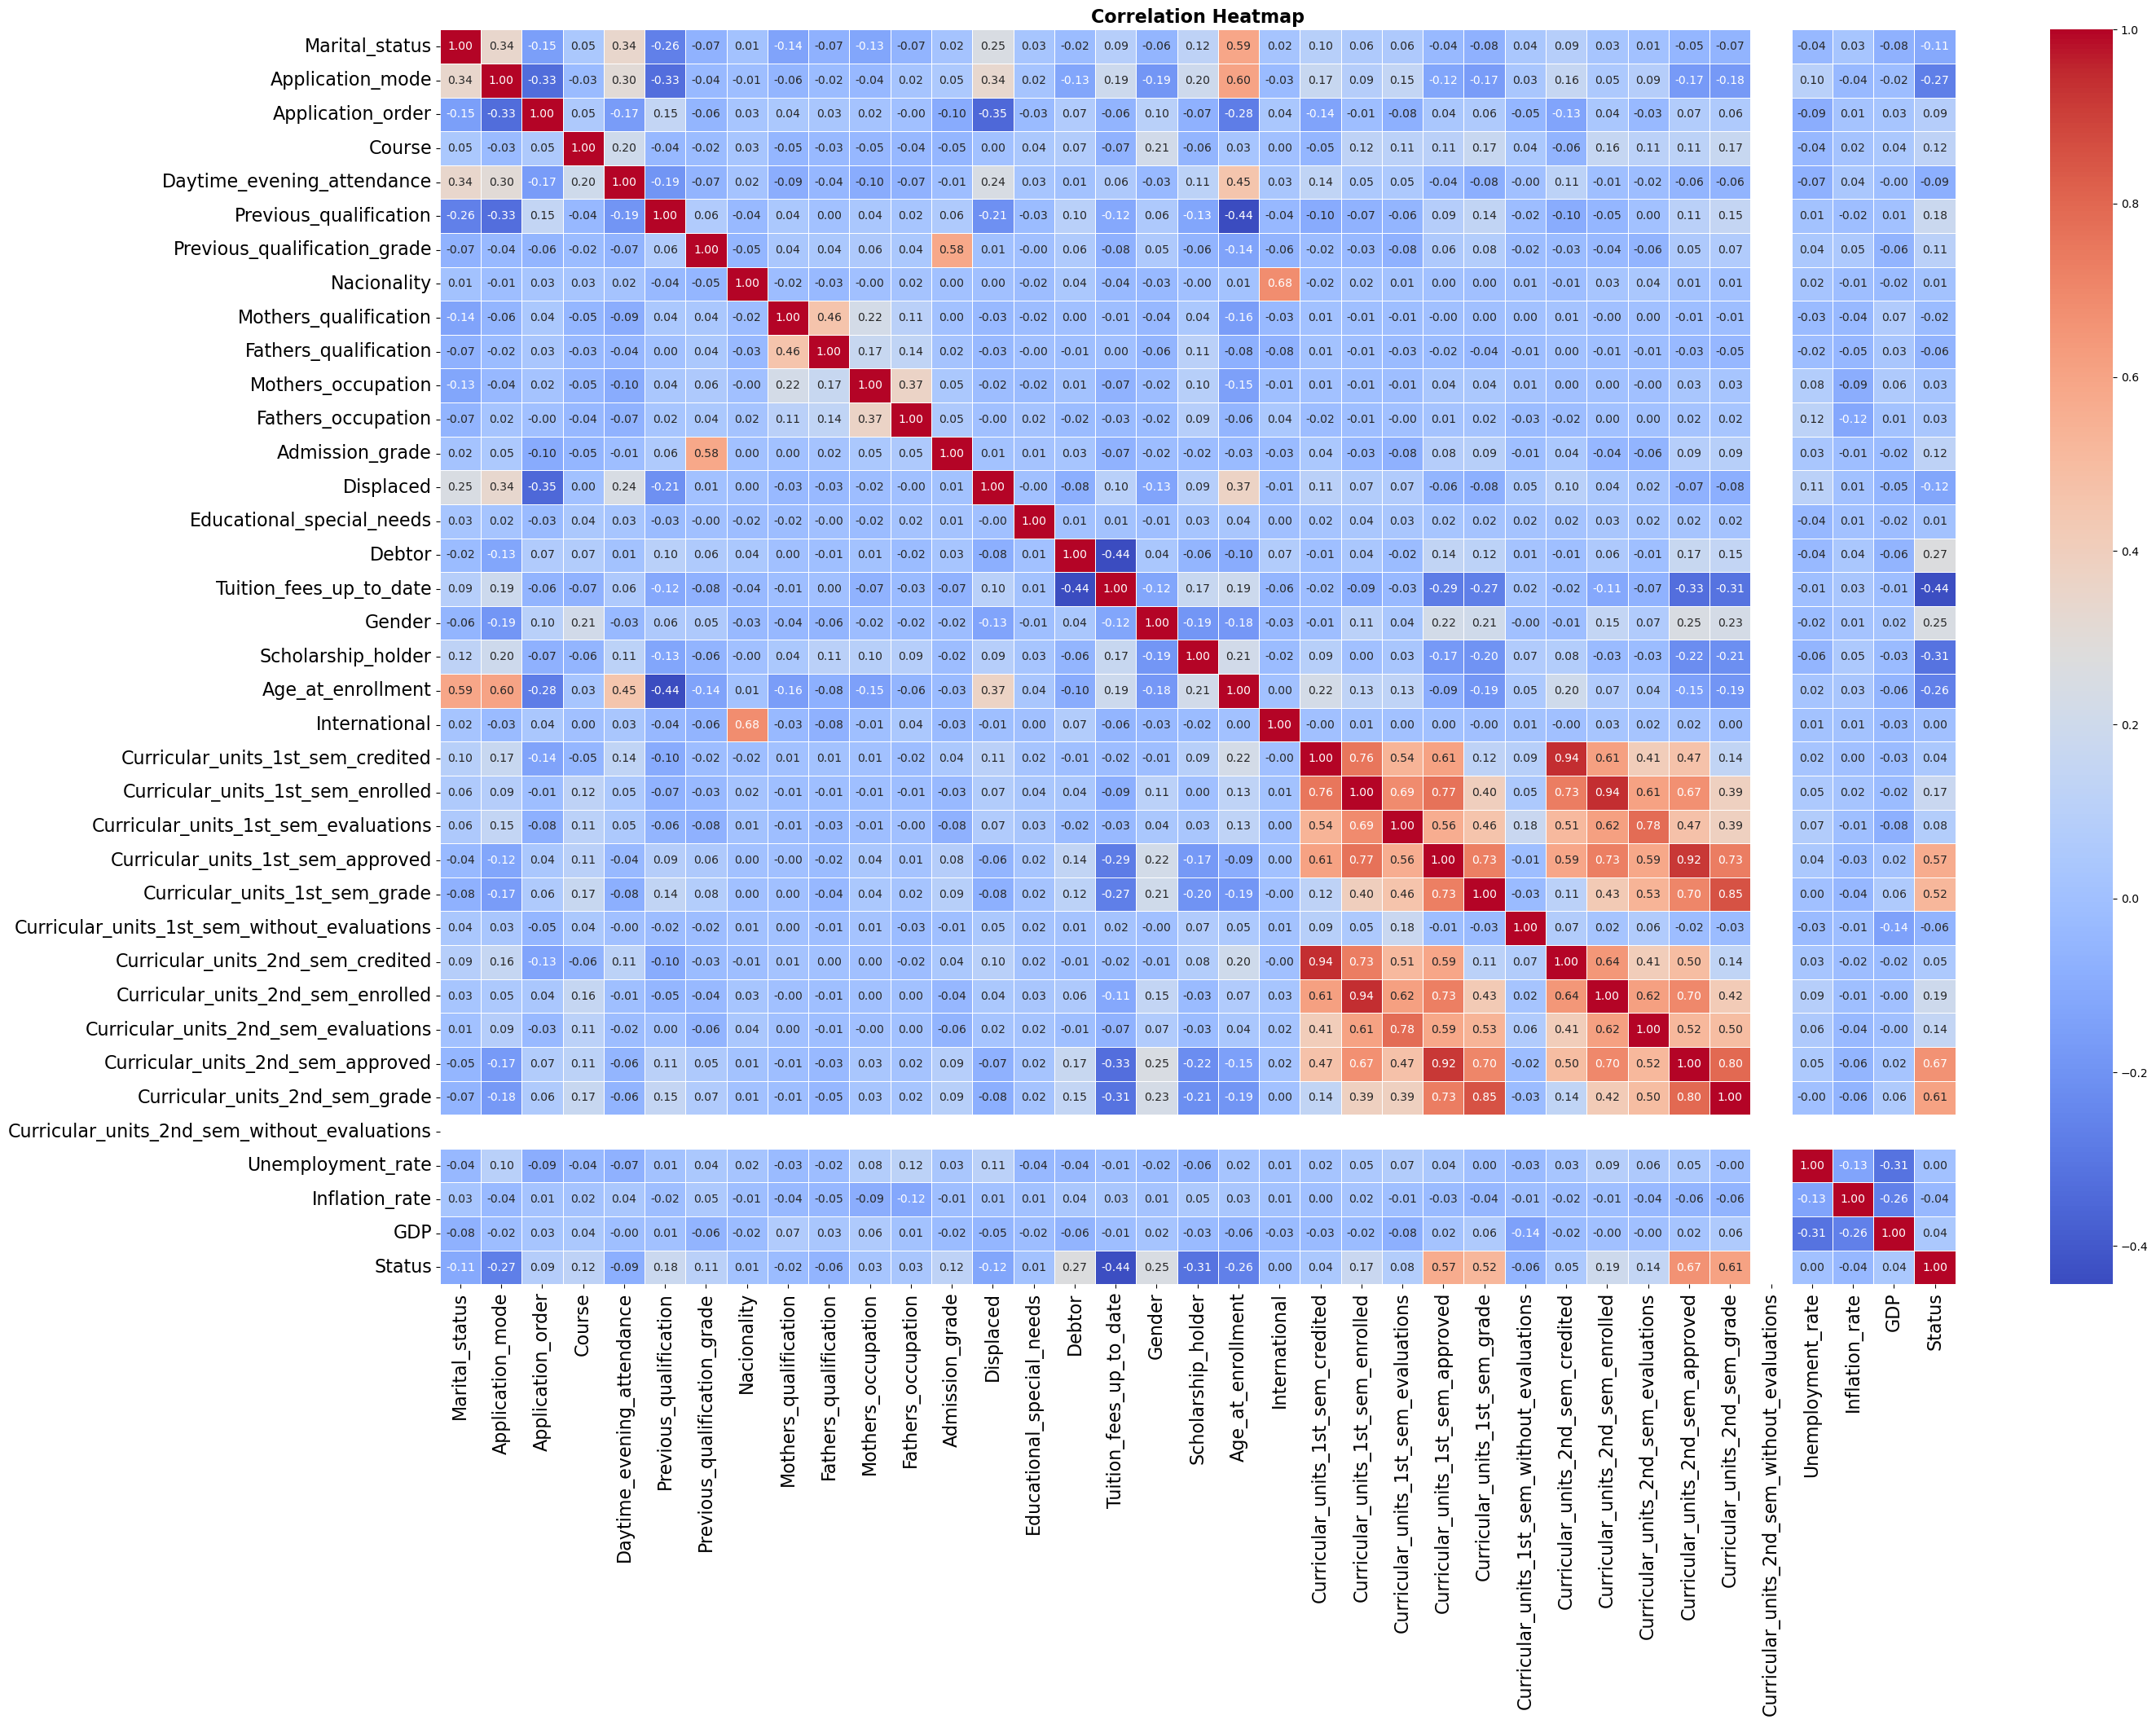

In [26]:
corr = df_model.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.show()

In [28]:
drop_col = ['Curricular_units_1st_sem_credited', 'Curricular_units_1st_sem_without_evaluations', 
            'Curricular_units_2nd_sem_credited', 'Curricular_units_2nd_sem_evaluations', 
            'Curricular_units_2nd_sem_without_evaluations', 'Application_mode', 'Application_order', 
            'Previous_qualification', 'Previous_qualification_grade', 'Nacionality', 'Mothers_qualification', 
            'Fathers_qualification', 'Unemployment_rate', 'Inflation_rate', 'GDP']

df_model = df_model.drop(drop_col, axis=1)

In [29]:
df_model.columns

Index(['Marital_status', 'Course', 'Daytime_evening_attendance',
       'Mothers_occupation', 'Fathers_occupation', 'Admission_grade',
       'Displaced', 'Educational_special_needs', 'Debtor',
       'Tuition_fees_up_to_date', 'Gender', 'Scholarship_holder',
       'Age_at_enrollment', 'International',
       'Curricular_units_1st_sem_enrolled',
       'Curricular_units_1st_sem_evaluations',
       'Curricular_units_1st_sem_approved', 'Curricular_units_1st_sem_grade',
       'Curricular_units_2nd_sem_enrolled',
       'Curricular_units_2nd_sem_approved', 'Curricular_units_2nd_sem_grade',
       'Status'],
      dtype='object')

### Split Dataset

In [30]:
X = df_model.drop(columns="Status")
y = df_model["Status"]

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training :", X_train.shape)
print("Testing :", X_test.shape)

Training : (2732, 21)
Testing : (684, 21)


### Feature Scaling

##### Standarisasi

In [32]:
# Melakukan Standarisasi untuk beberapa fitur
std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)

In [33]:
X_train

array([[-0.33492102,  0.12116587, -0.35580604, ..., -0.58245501,
        -1.45817827, -1.82713327],
       [-0.33492102,  0.12116587, -0.35580604, ..., -0.58245501,
        -0.17640767,  0.23525439],
       [-0.33492102,  0.12116587,  2.81052002, ..., -0.58245501,
        -1.45817827, -1.82713327],
       ...,
       [-0.33492102,  0.12116587, -0.35580604, ..., -0.58245501,
         0.14403498,  0.61023396],
       [-0.33492102, -0.5757292 , -0.35580604, ..., -0.58245501,
         0.14403498,  0.42274418],
       [-0.33492102,  0.81806094, -0.35580604, ..., -0.1267657 ,
         0.46447763,  0.79772375]])

Pada tahap ini, Beberapa fitur akan dilakukan standarisasi. Hal ini dilakukan agar data dapat digunakan untuk proses pemodelan.

# Modeling

In [34]:
# Selection model
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

In [35]:
accuracy, precision, recall, f1, roc_auc = {}, {}, {}, {}, {}

for key in models.keys():
    # Melakukan train setiap model
    models[key].fit(X_train, y_train)

    # Melakukan prediksi model
    predict = models[key].predict(X_test)

    # Menghitung metrik Accuracy, Precision and Recall
    accuracy[key] = accuracy_score(y_test, predict)
    precision[key] = precision_score(y_test, predict)
    recall[key] = recall_score(y_test, predict)
    f1[key] = f1_score(y_test, predict)
    roc_auc[key] = roc_auc_score(y_test, predict)

In [36]:
# Menampilkan evaluasi setiap model
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Roc_Auc'])
df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1-Score'] = f1.values()
df_model['Roc_Auc'] = roc_auc.values()

round(df_model, 2)

,Accuracy,Precision,Recall,F1-Score,Roc_Auc
Logistic Regression,0.86,0.85,0.95,0.90,0.83
Decision Trees,0.54,0.71,0.45,0.55,0.57
Random Forest,0.79,0.76,0.97,0.85,0.72
XGBoost,0.80,0.77,0.97,0.86,0.74
Naive Bayes,0.37,0.00,0.00,0.00,0.50


# Evaluasi

In [37]:
smote = SMOTE(random_state=12, sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [39]:
y_resampled.value_counts()

Status
0    2118
1    2118
Name: count, dtype: int64

### Cross Validation

In [40]:
for name, model in models.items():
    # Cross validation score
    y_scores = cross_val_score(model, X_train, y_train, cv=10, scoring='f1')

    # cetak rata-rata skor
    print(f"Rata-rata skor {name}:", round(np.mean(y_scores), 2))

Rata-rata skor Logistic Regression: 0.9
Rata-rata skor Decision Trees: 0.87
Rata-rata skor Random Forest: 0.92
Rata-rata skor XGBoost: 0.92
Rata-rata skor Naive Bayes: 0.83


### Confusion Matriks

In [41]:
models = {}

# Logistic Regression
models['Logistic Regression'] = LogisticRegression(random_state=42)

# Decision Trees
models['Decision Trees'] = DecisionTreeClassifier(random_state=42)

# Random Forest
models['Random Forest'] = RandomForestClassifier(random_state=42)

# XGBoost
models['XGBoost'] = XGBClassifier(random_state=42)

# Naive Bayes
models['Naive Bayes'] = GaussianNB()

Classification Report model Logistic Regression:
              precision    recall  f1-score   support

           0       0.91      0.88      0.90       414
           1       0.89      0.92      0.91       434

    accuracy                           0.90       848
   macro avg       0.90      0.90      0.90       848
weighted avg       0.90      0.90      0.90       848



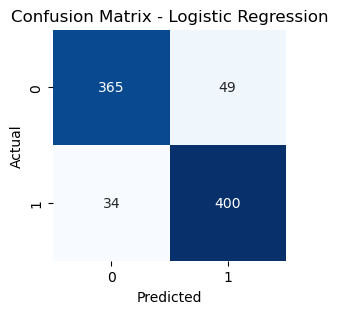

Classification Report model Decision Trees:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87       414
           1       0.88      0.86      0.87       434

    accuracy                           0.87       848
   macro avg       0.87      0.87      0.87       848
weighted avg       0.87      0.87      0.87       848



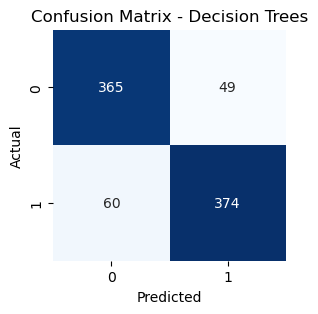

Classification Report model Random Forest:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       414
           1       0.89      0.94      0.91       434

    accuracy                           0.91       848
   macro avg       0.91      0.91      0.91       848
weighted avg       0.91      0.91      0.91       848



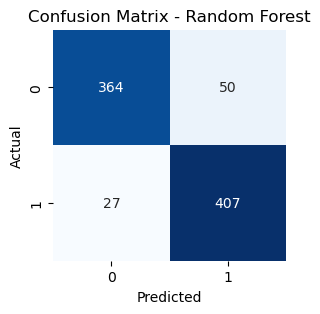

Classification Report model XGBoost:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       414
           1       0.90      0.95      0.93       434

    accuracy                           0.92       848
   macro avg       0.92      0.92      0.92       848
weighted avg       0.92      0.92      0.92       848



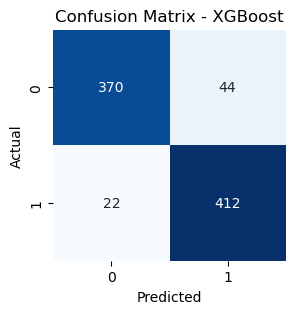

Classification Report model Naive Bayes:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84       414
           1       0.82      0.92      0.86       434

    accuracy                           0.85       848
   macro avg       0.86      0.85      0.85       848
weighted avg       0.86      0.85      0.85       848



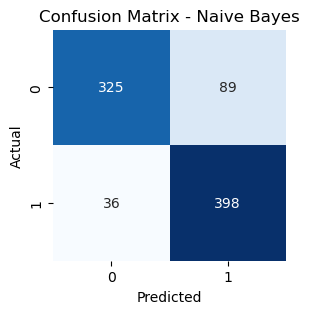

Model terbaik: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [42]:
best_model = None
best_accuracy = 0

for name, model in models.items():
    # Melakukan train setiap model
    model.fit(X_train, y_train)

    # Melakukan prediksi model
    predict = model.predict(X_test)

    # Best Model
    accuracy = accuracy_score(y_test, predict)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

    # Classification Report
    print(f"Classification Report model {name}:")
    print(classification_report(y_test, predict))

    # Confusion Matrix
    cm = confusion_matrix(y_test, predict)
    plt.figure(figsize=(3, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print(f"Model terbaik: {best_model}")

# Save File

In [43]:
# Data Clean
df_clean.to_csv("C:/Users/Siswantoro/Documents/Hafiizh/Github/Droupout-Prediction/Data/Data_Clean.csv", index=False)

In [44]:
# Data Visualisasi
df_mapping.to_csv("C:/Users/Siswantoro/Documents/Hafiizh/Github/Droupout-Prediction/Data/Data_to_Visualisasi.csv", index=False)

In [45]:
# Data Model
df_model.to_csv("C:/Users/Siswantoro/Documents/Hafiizh/Github/Droupout-Prediction/Data/Data_to_model.csv", index=False)

In [46]:
# Save Model
filename = 'C:/Users/Siswantoro/Documents/Hafiizh/Github/Droupout-Prediction/Data/result_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)